Scopul acestui proiect este de a construi un model care prezice activitatile umane precum mersul, urcatul si coboratul scarilor, statul in picioare, pe scaun si intins.
Datele au fost colectate de la 30 de persoane(subiectii din acest set de date), in timp ce faceau diferite activitati cu telefonul la brau. Datele au fost colectate cu ajutorul senzorilor( accelometru si Gyroscope) din smartphone.


Folosind senzorii din telefon, s-au capturat 3 axe pentru acceleratie liniara ( tAcc-XYZ) si 3 axe pentru
viteza unghiulara (tGyro-XYZ).
prefixul t denota timp

Numele caracteristicolor:
 1.semnalele senzorilor au fost preprocesate aplicand filtre de zgomot si apoi esantionate in ferestre cu latime fixa de 2.56 secunde fiecare cu 50% suprapunere, fiecare fereastra are 128 de citiri. 
 2. Din fiecare fereastra, un vector de caracteristici a fost obtinut calculand variabilele din domeniul timp si frecventa. in setul nostru de date fiecare datapoint reprezinta o fereastra cu diferite citiri
 3.semnalul de accelerare a fost separt in Body si Gravity(tBodyAcc-XYZ si tGravityAcc-XYZ) folosind un filtru de trecere mica cu frecventa de colt de 0.3 HZ
 4.Accelerarea liniare a corpului si viteza unghiulara au fost derivate in timp pentru a obtine jerk signals ( tbodyAccJerk-XYZ si tBodyGyroJerk-XYZ)
 5.magnitudinea acestor simnale 3-dimensionale au fost calculate folosind norma Euclidiana. Aceste magnitudini sunt reprezentate precum caracteristici cu numle  tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.
 6. În cele din urmă, am primit semnale de domeniu de frecvență de la unele dintre semnalele disponibile prin aplicarea unei FFT (Fast Fourier Transform). Aceste semnale obținute au fost etichetate cu prefixul 'f' la fel ca semnalele originale cu prefixul 't'. Aceste semnale sunt etichetate ca fBodyAcc-XYZ, fBodyGyroMag etc.,
 7. These are the signals that we got so far.

tBodyAcc-XYZ
tGravityAcc-XYZ
tBodyAccJerk-XYZ
tBodyGyro-XYZ
tBodyGyroJerk-XYZ
tBodyAccMag
tGravityAccMag
tBodyAccJerkMag
tBodyGyroMag
tBodyGyroJerkMag
fBodyAcc-XYZ
fBodyAccJerk-XYZ
fBodyGyro-XYZ
fBodyAccMag
fBodyAccJerkMag
fBodyGyroMag
fBodyGyroJerkMag
 8. Putem estima cateva seturi de variabile din semnalele de mai sus. Estimam urmatoarele proprietati pentru iecare semnal pe care l-am inregistrat pana acuma
mean(): Mean value
std(): Standard deviation
mad(): Median absolute deviation
max(): Largest value in array
min(): Smallest value in array
sma(): Signal magnitude area
energy(): Energy measure. Sum of the squares divided by the number of values.
iqr(): Interquartile range
entropy(): Signal entropy
arCoeff(): Autorregresion coefficients with Burg order equal to 4
correlation(): correlation coefficient between two signals
maxInds(): index of the frequency component with largest magnitude
meanFreq(): Weighted average of the frequency components to obtain a mean frequency
skewness(): skewness of the frequency domain signal
kurtosis(): kurtosis of the frequency domain signal
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
angle(): Angle between to vectors.
 9.Putem obtine cativa vectori noi luand media semnalelor intr-o singura fereastra. Acestia sunt folositi la angle() variablegravityMean
tBodyAccMean
tBodyAccJerkMean
tBodyGyroMean
tBodyGyroJerkMean

Datele de train si test au fost separate.



Citirile de accelerometru și giroscop sunt preluate de la 30 de voluntari (denumiți subiecți) în timp ce efectuează următoarele 6 activități.
Walking
WalkingUpstairs
WalkingDownstairs
Standing
Sitting
Lying.
Cadrul problemei
Datele de 30 de subiecți (voluntari) sunt împărțite aleatoriu la 70% (21) test și 30% (7) date tren.
Fiecare datapoint corespunde uneia dintre cele 6 activități.


Declarație problemă
Având în vedere o nouă informație de date, trebuie să prezicem Activitatea


Citirile sunt împărțite într-o fereastră de 2,56 secunde cu 50% suprapuneri.

Citirile de accelerometru sunt împărțite în accelerație gravitațională și lecturi de accelerație corporală, care au componente x, y și z fiecare.

Citirile la giroscop sunt măsurarea vitezei unghiulare care are componente x, y și z.

Semnalele Jerk sunt calculate pentru citirile BodyAcceleration.

Transformările Fourier se realizează pe citirile de timp menționate mai sus pentru a obține lecturi de frecvență.

Acum, pe toate citirile semnalului de bază., Pentru fiecare fereastră, sunt calculate medie, max, nebun, sma, arcoeficient, grupuri de legătură, entropie etc.

Obținem un vector de caracteristici de 561 de caracteristici și aceste caracteristici sunt date în setul de date.

Fiecare fereastră de lecturi este un document de date cu 561 de caracteristici.
    

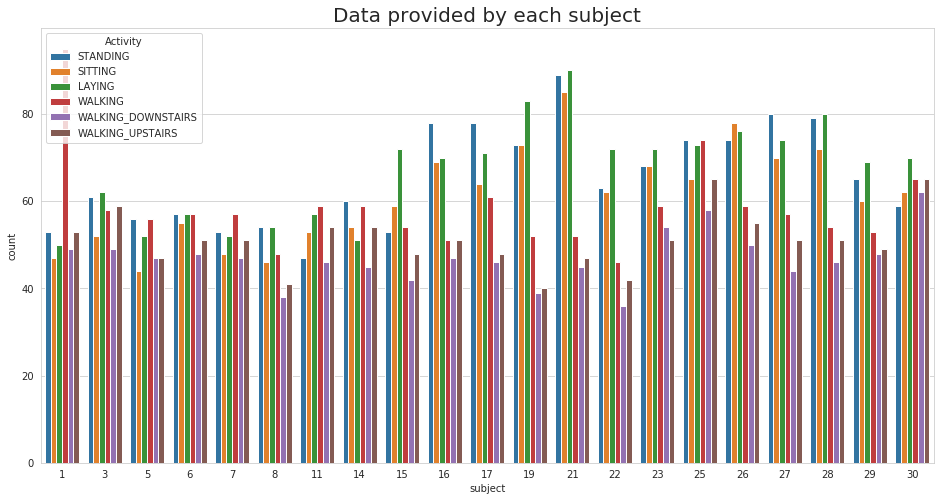

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,normalize)
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline

#Visualisation_1

train_data = pd.read_csv('../data/train.csv')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each subject', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train_data)
plt.show()

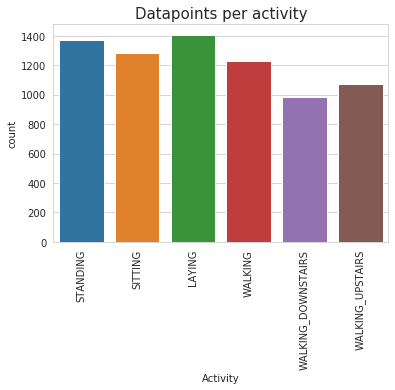

In [2]:
#Visualisation_2

plt.title('Datapoints per activity', fontsize=15)
sns.countplot(train_data.Activity)
plt.xticks(rotation=90)
plt.show()

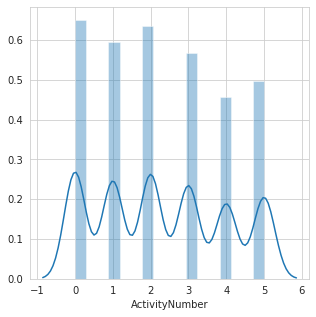

In [143]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
activity_labels = gle.fit_transform(train_data['Activity'])
activity_mappings = {index: label for index, label in
                  enumerate(gle.classes_)}

new_train_data=train_data.copy(deep=True)
new_train_data['ActivityNumber']=activity_labels
new_train_data.describe()



import matplotlib.pyplot as plt
import seaborn as sbn

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sbn.distplot(new_train_data['ActivityNumber'], ax=ax)

In [144]:
#new_train_data=new_train_data.drop(columns=['subject'],axis=1)
#new_train_data=new_train_data.drop(columns=['Activity'],axis=1)
new_train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityNumber
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,2.315152
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.690628
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,1.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,2.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,5.000000


In [140]:
#Preprocesare train(Normalizare)

train_data_copy2=new_train_data
train_data_copy = new_train_data.iloc[:,0:-3]
train_data_copy2.iloc[:,0:-3] = (train_data_copy - train_data_copy.mean()) / (train_data_copy.max() - train_data_copy.min())
train_data_norm=train_data_copy2
train_data_norm.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityNumber
count,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,...,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7352.000000,7.352000e+03,7352.000000,7352.000000
mean,5.738367e-19,3.473222e-19,1.238279e-18,-1.063108e-17,-3.092678e-17,1.932924e-18,-1.546339e-17,-3.479263e-17,-1.353047e-17,-2.657770e-17,...,1.449693e-17,5.557156e-18,-2.416155e-18,-6.402810e-18,9.181387e-18,-3.865847e-18,0.000000,-4.832309e-17,17.413085,2.315152
std,3.513067e-02,2.040526e-02,2.831759e-02,2.243672e-01,2.623255e-01,2.093434e-01,2.120363e-01,2.469637e-01,2.070609e-01,2.722733e-01,...,1.572026e-01,1.703885e-01,2.241531e-01,3.043490e-01,2.394571e-01,2.559034e-01,0.201251,1.395611e-01,8.975143,1.690628
min,-6.372441e-01,-4.911523e-01,-4.454295e-01,-1.972808e-01,-2.551707e-01,-1.976232e-01,-1.847439e-01,-2.404336e-01,-1.969248e-01,-2.656980e-01,...,-1.913876e-01,-4.984689e-01,-5.010930e-01,-5.046904e-01,-4.979860e-01,-2.552264e-01,-0.716157,-4.717426e-01,1.000000,0.000000
25%,-5.756446e-03,-3.583791e-03,-5.925899e-03,-1.936576e-01,-2.438227e-01,-1.877397e-01,-1.815393e-01,-2.293352e-01,-1.870503e-01,-2.338073e-01,...,-1.125822e-01,-6.587694e-02,-1.458675e-01,-2.456588e-01,-1.855441e-01,-1.612589e-01,-0.051738,-4.344975e-02,8.000000,1.000000
50%,1.352615e-03,2.381419e-04,2.323851e-04,-1.703790e-01,-1.779433e-01,-1.273055e-01,-1.600985e-01,-1.679255e-01,-1.254962e-01,-2.065166e-01,...,-4.415724e-02,4.175965e-04,3.378470e-03,4.496564e-06,2.812021e-03,-1.099351e-01,0.083535,2.984795e-02,19.000000,2.000000
75%,6.986500e-03,3.456224e-03,5.673718e-03,1.813128e-01,2.487887e-01,1.711694e-01,1.689160e-01,2.338847e-01,1.702396e-01,2.257376e-01,...,6.205440e-02,7.193318e-02,1.453375e-01,2.488923e-01,1.830333e-01,-9.766069e-03,0.128376,8.208678e-02,26.000000,4.000000
max,3.627559e-01,5.088477e-01,5.545705e-01,8.027192e-01,7.448293e-01,8.023768e-01,8.152561e-01,7.595664e-01,8.030752e-01,7.343020e-01,...,8.086124e-01,5.015311e-01,4.989070e-01,4.953096e-01,5.020140e-01,7.447736e-01,0.283843,5.282574e-01,30.000000,5.000000


In [146]:
#Preprocesare test(Normalizare)


import pandas as pd
test_data = pd.read_csv('../data/test.csv')
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
activity_labels = gle.fit_transform(test_data['Activity'])
activity_mappings = {index: label for index, label in
                  enumerate(gle.classes_)}

test_data['ActivityNumber']=activity_labels

test_data_copy = test_data.iloc[:,0:-3]
test_data.iloc[:,0:-3] = (test_data_copy - test_data_copy.mean()) / (test_data_copy.max() - test_data_copy.min())
test_data_norm=test_data
test_data_norm.describe()
test_data.describe()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityNumber
count,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,...,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2947.000000,2947.000000
mean,1.615418e-16,-1.491850e-17,-1.733711e-16,9.053573e-16,5.678073e-16,4.147043e-16,6.546059e-16,3.670856e-16,1.211563e-15,6.292896e-16,...,-1.131697e-16,-9.794977e-19,-7.233214e-18,-6.630446e-18,-1.356228e-17,-1.708847e-16,3.707022e-17,2.802870e-17,12.986427,2.401765
std,4.792379e-02,4.227530e-02,3.993973e-02,2.816544e-01,2.471345e-01,2.436417e-01,2.676717e-01,2.399596e-01,2.507284e-01,3.013102e-01,...,1.555211e-01,1.681664e-01,2.248151e-01,3.176695e-01,2.517766e-01,2.801872e-01,1.694621e-01,1.256111e-01,6.950984,1.706414
min,-6.851854e-01,-5.665458e-01,-4.370723e-01,-2.634789e-01,-2.458351e-01,-2.452932e-01,-2.488680e-01,-2.386294e-01,-2.536066e-01,-2.819737e-01,...,-2.006222e-01,-5.029091e-01,-5.037008e-01,-5.197501e-01,-4.890766e-01,-2.587643e-01,-5.165845e-01,-4.684435e-01,2.000000,0.000000
25%,-9.431749e-03,-1.165452e-02,-1.193702e-02,-2.575449e-01,-2.326673e-01,-2.299557e-01,-2.439456e-01,-2.257375e-01,-2.371040e-01,-2.716734e-01,...,-1.154186e-01,-6.794018e-02,-1.446642e-01,-2.796308e-01,-2.064579e-01,-1.737665e-01,-2.756240e-02,-2.588749e-02,9.000000,1.000000
50%,2.466373e-03,1.472588e-03,-6.737355e-05,-2.167914e-01,-1.413211e-01,-1.301423e-01,-2.059563e-01,-1.386218e-01,-1.261277e-01,-2.246361e-01,...,-4.245833e-02,-3.796265e-05,1.499222e-03,3.543808e-03,-4.735524e-03,-1.187013e-01,5.574351e-02,1.979287e-02,12.000000,2.000000
75%,1.115662e-02,1.267797e-02,1.052345e-02,2.363563e-01,2.012052e-01,2.165479e-01,2.220584e-01,1.946022e-01,2.202518e-01,2.600068e-01,...,7.021167e-02,7.050663e-02,1.436110e-01,2.912212e-01,2.067629e-01,-1.761676e-02,9.686224e-02,7.339654e-02,18.000000,4.000000
max,3.148146e-01,4.334542e-01,5.629277e-01,7.365211e-01,7.541649e-01,7.547068e-01,7.511320e-01,7.613706e-01,7.463934e-01,7.180263e-01,...,7.993778e-01,4.970909e-01,4.962992e-01,4.802499e-01,5.109234e-01,7.412357e-01,4.834155e-01,5.315565e-01,24.000000,5.000000


In [148]:
test_data = pd.read_csv('../data/test.csv')
test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


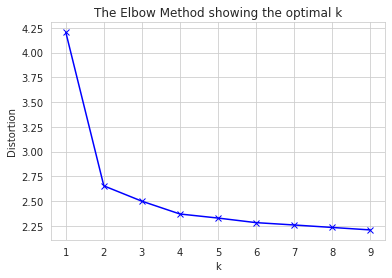

In [109]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

X=test_data_norm.iloc[:,0:-3]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [113]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=6)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print(centroids) # From sci-kit learn


[[-8.81838037e-03  1.14568462e-02  1.22516107e-02 ... -8.75634209e-02
   2.58935503e-02 -6.67743308e-03]
 [-4.74781807e-03 -7.60065505e-03 -4.34399430e-03 ... -1.12578083e-01
   8.54884063e-02  6.51055251e-02]
 [ 6.95949167e-04  3.15355376e-04 -1.00101112e-04 ...  5.74536076e-01
  -2.65375261e-01 -1.72146735e-01]
 [ 3.70941285e-03  2.36873285e-03 -8.88734293e-04 ... -1.35960221e-01
   6.67403768e-02  5.82746540e-02]
 [ 2.62983655e-03  1.45341322e-03  1.37130088e-04 ... -1.33239653e-01
   2.00420043e-02  9.16990570e-03]
 [ 8.22847696e-03 -5.48292720e-03 -3.97348971e-03 ... -1.14059067e-01
   9.56583600e-02  5.02547910e-02]]


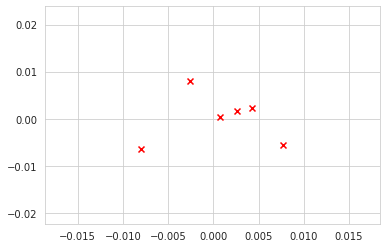

In [110]:
kmeanModel = KMeans(n_clusters=6).fit(X)
kmeanModel.fit(X)
centers = np.array(kmeanModel.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

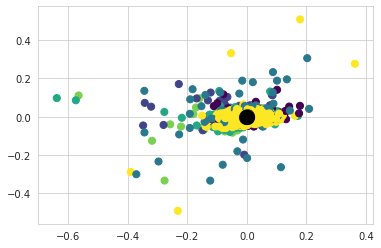

Score: 0.7599292709466812


In [123]:
from sklearn.cluster import KMeans
data_t1 = pd.read_csv('../data/train.csv')
ls1=list(data_t1.columns) 
#print(ls)

ls1.pop()
xk=train_data_norm.loc[:, ls ].values
yk=train_data_norm['ActivityNumber']
kmeans = KMeans(n_clusters=6)
kmeans.fit(xk,yk)
y_kmeans = kmeans.predict(xk)

plt.scatter(xk[:, 0],xk[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


from sklearn.metrics import completeness_score
y5=train_data_norm['ActivityNumber']
score13 = completeness_score(y5,y_kmeans)
print('Score:', score)


Y_pred [2 2 2 ... 5 5 5]
Y_pred_test [2 2 2 ... 5 5 5]


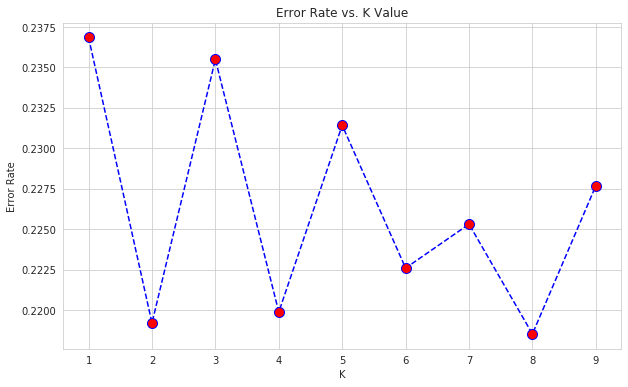

[1.         0.97213622 0.97404022 0.997557   0.99745806 0.9990689 ]
[0.96438884 0.74611399 0.78456014 0.70661157 0.7223382  0.71764706]


In [153]:
## data_t = pd.read_csv('../data/train.csv')
ls=list(data_t.columns) 
#print(ls)

ls.pop()
x=test_data_norm.loc[:, ls ].values
y=test_data_norm['ActivityNumber']

knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(train_data_norm.loc[:, ls ].values, train_data_norm['ActivityNumber'])
Y_pred = knn.predict(train_data_norm.loc[:, ls ].values)  
Y_pred_test= knn.predict(test_data_norm.loc[:, ls ].values)  
print('Y_pred', Y_pred)
print('Y_pred_test', Y_pred_test)

error_rate = []
K = range(1,10)
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(train_data_norm.loc[:, ls ].values, train_data_norm['ActivityNumber'])
    pred_i = knn.predict(x)
    error_rate.append(np.mean(pred_i != y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


from sklearn.metrics import f1_score
f1score=f1_score(y_true=train_data_norm['ActivityNumber'], y_pred=Y_pred, average=None)
print(f1score)

f1score_test=f1_score(y_true=y, y_pred=Y_pred_test, average=None)
print(f1score_test)





In [116]:
y4=test_data_norm['ActivityNumber']
score1 = accuracy_score(y4, Y_pred_test)
print('Accuracy test:', score1)

y3=train_data_norm['ActivityNumber']
score2 = accuracy_score(y3, Y_pred)
print('Accuracy train:', score2)

Accuracy test: 0.7599292709466812
Accuracy train: 0.7599292709466812


In [156]:
from sklearn.naive_bayes import GaussianNB

data_t = pd.read_csv('../data/train.csv')
ls=list(data_t.columns)
#print(ls)

ls.pop()
x=train_data_norm.loc[:, ls ].values
y=train_data_norm['ActivityNumber']


mnb = GaussianNB()               #loading model
mnb.fit(train_data_norm.loc[:, ls ].values, train_data_norm['ActivityNumber'])            #fitting the model
predicted_mnb = mnb.predict(test_data_norm.loc[:, ls ].values)
predicted_train = mnb.predict(train_data_norm.loc[:, ls ].values)
print('predicted_mnb', predicted_mnb)
print('predicted_train', predicted_train)


predicted_mnb [5 5 5 ... 3 5 3]
predicted_train [2 2 2 ... 5 5 5]


In [161]:
from sklearn.metrics import accuracy_score
y2=test_data_norm['ActivityNumber']
score3 = accuracy_score(y2, predicted_mnb)
print('Accuracy test:', score3)

y5=train_data_norm['ActivityNumber']
score4 = accuracy_score(y3, predicted_train)
print('Accuracy train:', score4)


Accuracy test: 0.7599292709466812
Accuracy train: 0.7599292709466812


In [158]:
# split train and validation data: K-Fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

trainData = None
validationData = None
for train_data1, test_data1 in kf.split(train_data_norm):
    trainData = train_data_norm.loc[train_data1]
    validationData = train_data_norm.loc[test_data1]
print(trainData)
print("Datele de validare")
print()
print(validationData)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.007048          -0.001299          -0.011882   
1              0.001965           0.000642          -0.007190   
2              0.002582          -0.000886          -0.002160   
3              0.002343          -0.004253          -0.007071   
4              0.001070           0.000563          -0.003110   
...                 ...                ...                ...   
3671           0.008031          -0.000839          -0.005871   
3672          -0.016255           0.014229           0.005816   
3673          -0.005157           0.011970          -0.004582   
3674           0.001089           0.000430           0.002079   
3675          -0.000066          -0.004602           0.009477   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.194920         -0.246423         -0.154386         -0.182300   
1            -0.196403         -0.242346         -0.177784 

0.7774007465218866
0.9893906420021763
0.332541567695962
0.7599292709466812


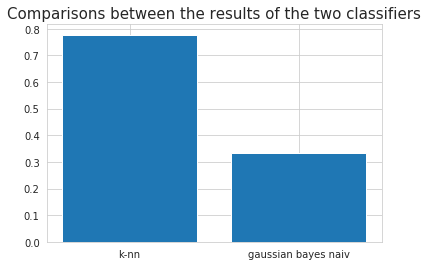

In [170]:
height = []
height.append(score1)
height.append(score3)
print(score1)
print(score2)
print(score3)
print(score4)
bars = ('k-nn', 'gaussian bayes naiv')
y_pos = np.arange(len(bars))
plt.title('Comparisons between the results of the two classifiers', fontsize=15)

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()
